### minimize MSE closed-form solution called Normal equation

$$
\theta = \left( X^T X \right)^{-1} X^T y
$$

y = 4 + 3x1 + Gaussian noise

In [2]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [10]:
theta_best # smaller the dataset the harder

array([[4.21509616],
       [2.77011339]])

In [22]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

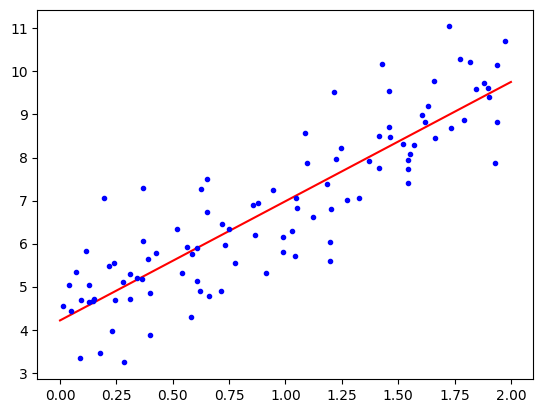

In [23]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-",label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # based on np.linalg.lstsq
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [25]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [26]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Moore–Penrose inverse
$$
\hat{\theta} = X^+ y
$$
pseudoinverse of X
$$
X^+ 
$$


In [28]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

pseudoinverse is calculated using singular value decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices

numpy.linalg.svd()
$$
U \Sigma V^\top
$$

$$
X^+ = V \Sigma^+ U^\top
$$

Σ+ is the pseudoinverse of the diagonal matrix Σ, which involves taking the reciprocal of all nonzero singular values and transposing the matrix.

This approach is more efficient than computing the Normal equation. Normal equation may not
work if the matrix X⊺X is not invertible (i.e., singular), if m < n or if some
features are redundant, but the pseudoinverse is always defined.

inverting a matrix is typically about O(n^2.4) to O(n^3), `LinearRegression` class is O(n^2)

when using gradient decent we have to ensure all features have a similar scale `StandardScaler`

computing gradient descent:

$$
\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^m \left( \theta^\top x_i - y_i \right) x_{i,j}
$$

to compute all gradients for each model parameter, we need gradient vector of the cost function

$$
\nabla_\theta MSE(\theta) =
\begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_1} \\
\frac{\partial J(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_n}
\end{bmatrix}
$$

$$
 = \frac{2}{m} X^\top (X\theta - y)
$$

training a linear regression model when there
are hundreds of thousands of features is much faster using gradient
descent than using the Normal equation or SVD decomposition.

$$
\theta_{\text{next}} = \theta - \eta \cdot \frac{2}{m} X^\top (X\theta - y)
$$

### Batch Gradient Descent

In [40]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [41]:
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

This is better as than batch because instead of using the whole training set it picks a random instance at every step and computes gradients only on that single instance

the cost function is more random so it may jump around and not settle at the min but its a good escape from local optima as there may be a global min.

so for this we make the learning rate high then go low called simulated annealing

we need a learning schedule so it has proper slowing/speeding up

In [42]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        y1 = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - y1) # SGD we leave out division
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [43]:
theta

array([[4.21076011],
       [2.74856079]])

### Stochastic Gradient Descent w/ Scikit-Learn

`SGDRegressor`

In [44]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000,
    tol=1e-5,
    penalty=None,
    eta0=0.01,
    n_iter_no_change=100,
    random_state=42
)
sgd_reg.fit(X, y.ravel()) # ravel because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [46]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))